In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import kruskal


In [3]:
FILE_NAME = "UTI DATASET (LABELED).xlsx"
df = pd.read_excel(FILE_NAME)
display(df)

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific_Gravity,WBC,RBC,Epithelial_Cells,Mucous_Threads,Amorphous_Urates,Bacteria,Diagnosis
0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE
2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE
3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.6,MALE,YELLOW,CLEAR,NEGATIVE,NEGATIVE,6.0,1.015,1-2,0-1,RARE,FEW,NONE SEEN,RARE,NEGATIVE
1433,42.0,MALE,YELLOW,CLEAR,NEGATIVE,NEGATIVE,6.5,1.010,0-2,0-2,RARE,NONE SEEN,NONE SEEN,RARE,NEGATIVE
1434,47.0,FEMALE,DARK YELLOW,CLEAR,NEGATIVE,TRACE,6.0,1.030,2-4,0-2,MODERATE,MODERATE,NONE SEEN,RARE,NEGATIVE
1435,57.0,FEMALE,DARK YELLOW,CLEAR,NEGATIVE,TRACE,5.0,1.030,0-2,0-2,PLENTY,PLENTY,NONE SEEN,FEW,NEGATIVE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1436 non-null   float64
 1   Gender            1437 non-null   object 
 2   Color             1436 non-null   object 
 3   Transparency      1437 non-null   object 
 4   Glucose           1437 non-null   object 
 5   Protein           1437 non-null   object 
 6   pH                1437 non-null   float64
 7   Specific_Gravity  1437 non-null   float64
 8   WBC               1437 non-null   object 
 9   RBC               1437 non-null   object 
 10  Epithelial_Cells  1437 non-null   object 
 11  Mucous_Threads    1437 non-null   object 
 12  Amorphous_Urates  1437 non-null   object 
 13  Bacteria          1437 non-null   object 
 14  Diagnosis         1437 non-null   object 
dtypes: float64(3), object(12)
memory usage: 168.5+ KB


In [5]:
df.describe()

,Age,pH,Specific_Gravity
count,1436.000000,1437.000000,1437.000000
mean,27.226323,6.053236,1.015849
std,23.438530,0.598383,0.007283
min,0.100000,5.000000,1.005000
25%,6.000000,6.000000,1.010000
50%,23.000000,6.000000,1.015000
75%,45.000000,6.500000,1.020000
max,92.000000,8.000000,1.030000


### Bivariate Analysis

<p>Chi-square test of independence</p>


<p>Null Hypothesis </p>

$$H_{0}$$

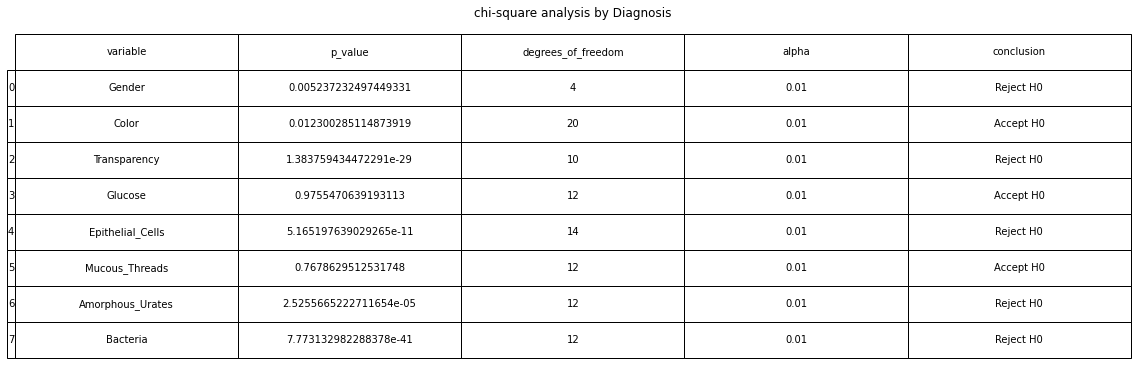

In [6]:
def chisquare_analysis(dataframe, independent_var, dependent_var, alpha=0.01):
    result_container = pd.DataFrame(columns=["variable", "p_value", "degrees_of_freedom", "alpha", "conclusion"])

    fig = plt.figure(figsize = (20, .2))
    ax = fig.add_subplot(111)

    for variable in independent_var:
        variable_result = {}
        
        chisqt = pd.crosstab(dataframe[variable], dataframe[dependent_var], margins=True)

        _, p_value, degrees_of_freedom = chi2_contingency(chisqt)[0:3]

        variable_result["variable"] = variable
        variable_result["p_value"] = p_value
        variable_result["degrees_of_freedom"] = degrees_of_freedom
        variable_result["alpha"] = alpha
        variable_result["conclusion"] = "Reject H0" if p_value <= alpha else "Accept H0"

        result_container = result_container.append(variable_result,
                         ignore_index=True)
        
    
    ax.table(cellText = result_container.values, rowLabels = result_container.index, 
         colLabels = result_container.columns, cellLoc="center").scale(1, 3) 
    
    ax.set_title("chi-square analysis by Diagnosis")

    ax.axis("off")

chisquare_analysis(df, ["Gender", "Color", "Transparency", 
                   "Glucose", "Epithelial_Cells", 
                   "Mucous_Threads", "Amorphous_Urates", "Bacteria"], "Diagnosis")

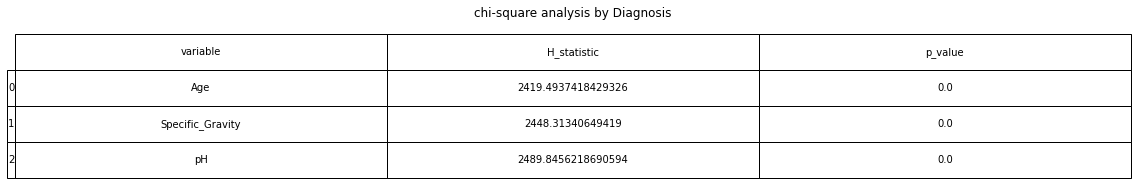

In [7]:

def kruskal_test(dataframe, continous_vars):
    result_container = pd.DataFrame(columns=["variable", "H_statistic", "p_value"])

    for variable in continous_vars:

        variable_result = {}

        h_statistic, p_value = kruskal(dataframe[variable], dataframe["Diagnosis"].map({"NEGATIVE":0, "POSITIVE":1}), nan_policy="omit")

        variable_result["variable"] = variable
        variable_result["H_statistic"] = h_statistic
        variable_result["p_value"] = p_value

        result_container = result_container.append(variable_result,
                         ignore_index=True)
    
    plt.figure(figsize = (20, .2))

    plt.table(cellText = result_container.values, rowLabels = result_container.index, 
         colLabels = result_container.columns, cellLoc="center").scale(1, 3) 
    
    plt.title("chi-square analysis by Diagnosis")

    plt.axis("off");
        

kruskal_test(df, ["Age", "Specific_Gravity", "pH"])

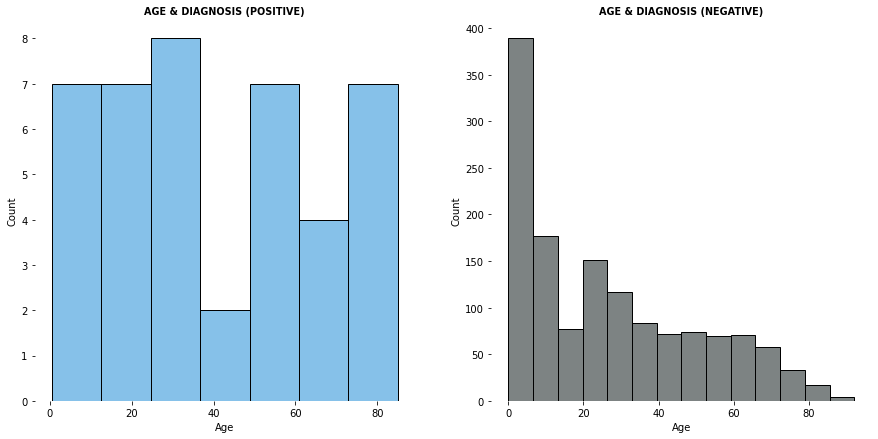

In [8]:


fig, axs = plt.subplots(1, 2, figsize=(15,7))

colors = ["#5DADE2", "#515A5A"]
list_of_titles = ["AGE & DIAGNOSIS (POSITIVE)", "AGE & DIAGNOSIS (NEGATIVE)"]
diagnoses_filter = ["POSITIVE", "NEGATIVE"]

matplotlib.rcParams.update({"font.size": 8})

for ax, clr, title, filter_ in zip(axs, colors, list_of_titles, diagnoses_filter):

    for spine in ["top", "bottom", "left", "right"]:
        ax.spines[spine].set_visible(False)

    sns.histplot(df[df["Diagnosis"] == filter_], x = "Age", ax=ax, color=clr)
    ax.set_title(title, fontweight="bold");

In [21]:
def bivariate_bar_graph(dataframe, x, y, nrows, ncols, y_filter, colors, list_of_titles, invert_yaxis=True, visible_spines=False):

    assert len(y_filter) == len(colors) and len(y_filter) == len(list_of_titles), "y_filter, colors and list_of_titles must have the same length"

    _, axs = plt.subplots(nrows, ncols, figsize=(16, 6))

    for ax, clr, title, filter_ in zip(axs, colors, list_of_titles, y_filter):

        if not visible_spines:
            for spine in ["top", "bottom", "left", "right"]:
                ax.spines[spine].set_visible(False)

        data = dataframe[[x, y]][dataframe[y] == filter_].groupby(by=x).count()

        # set the horizontal bargraph
        ax.barh(data.index, data[y], ec="k", color=clr)

        if invert_yaxis:
            ax.invert_yaxis()

        # set a title for the plot
        ax.set_title(title, fontweight="bold");

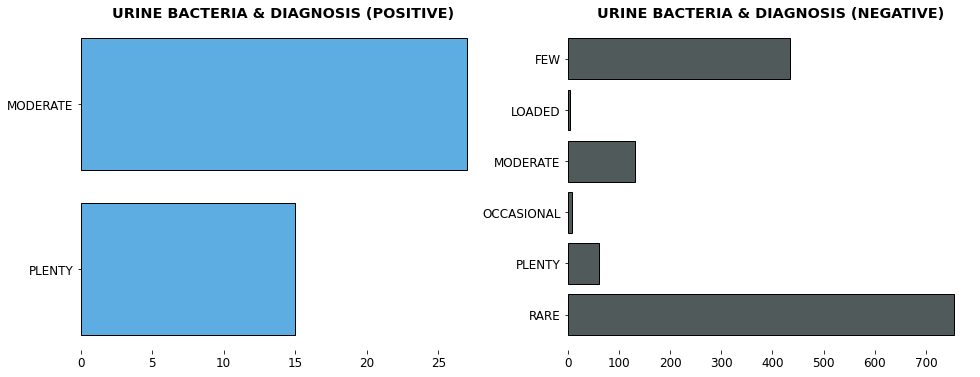

In [22]:
bivariate_bar_graph(df, x="Bacteria", y="Diagnosis", nrows=1, ncols=2, 
                    y_filter=["POSITIVE", "NEGATIVE"], colors=["#5DADE2", "#515A5A"], 
                    list_of_titles=["URINE BACTERIA & DIAGNOSIS (POSITIVE)", "URINE BACTERIA & DIAGNOSIS (NEGATIVE)"])

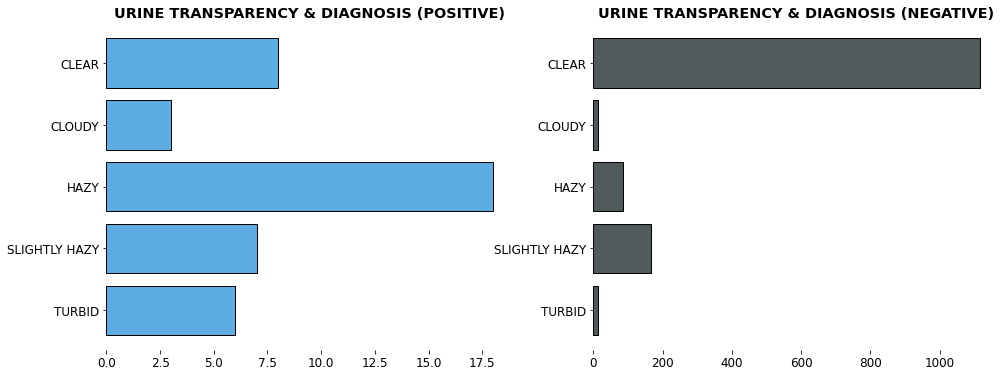

In [23]:
bivariate_bar_graph(df, x="Transparency", y="Diagnosis", nrows=1, ncols=2, 
                    y_filter=["POSITIVE", "NEGATIVE"], colors=["#5DADE2", "#515A5A"], 
                    list_of_titles=["URINE TRANSPARENCY & DIAGNOSIS (POSITIVE)", "URINE TRANSPARENCY & DIAGNOSIS (NEGATIVE)"])

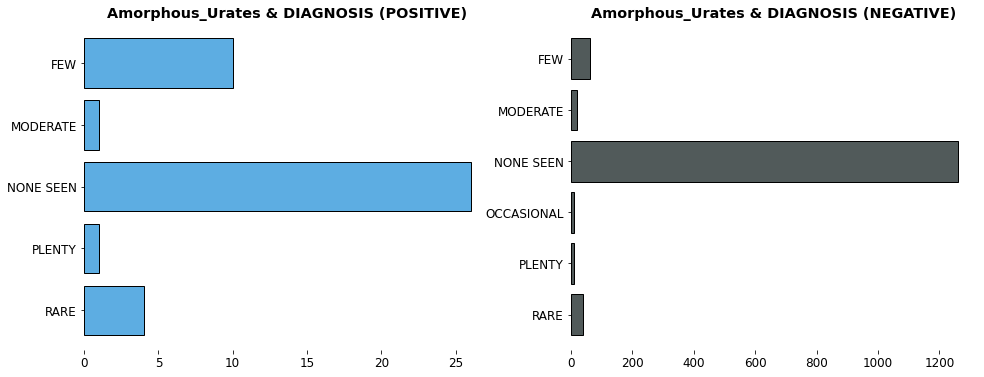

In [24]:
bivariate_bar_graph(df, x="Amorphous_Urates", y="Diagnosis", nrows=1, ncols=2, 
                    y_filter=["POSITIVE", "NEGATIVE"], colors=["#5DADE2", "#515A5A"], 
                    list_of_titles=["Amorphous_Urates & DIAGNOSIS (POSITIVE)", "Amorphous_Urates & DIAGNOSIS (NEGATIVE)"])

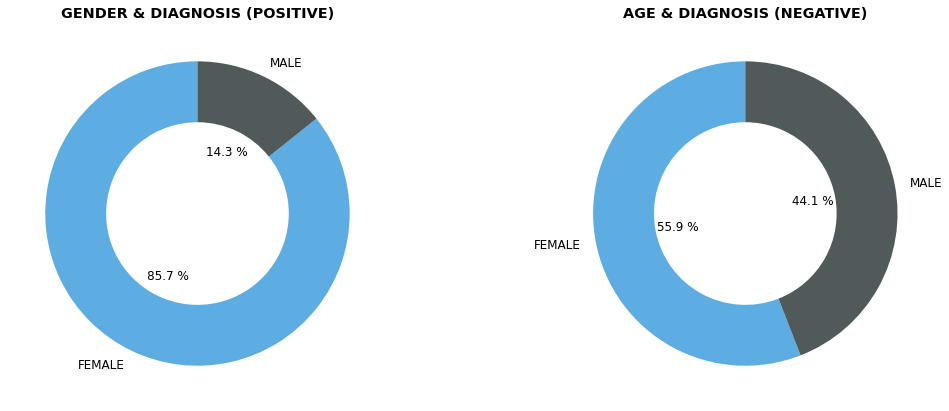

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

matplotlib.rcParams.update({"font.size": 12})

diagnoses_filter = ["POSITIVE", "NEGATIVE"]
colors = ["#df362d", "#1b1b1b"]
list_of_titles = ["GENDER & DIAGNOSIS (POSITIVE)", "AGE & DIAGNOSIS (NEGATIVE)"]

for ax, clr, title, filter_ in zip(axs, colors, list_of_titles, diagnoses_filter):

    data = df[["Gender", "Diagnosis"]][df["Diagnosis"] == filter_].groupby(by="Gender").count()

    ax.pie(data["Diagnosis"].tolist(), wedgeprops={"width":0.4, "linewidth":2}, 
       startangle=90, 
       colors=["#5DADE2", "#515A5A"],
       labels = data.index,
       autopct="%.1f %%",
       pctdistance=0.45)

    # set a title for the plot
    ax.set_title(title, fontweight="bold");